# ResNet with Transfomers

- Minor Applied AI HvA
- Docenten: Michiel Bontenbal and Maarten Post
- Wednesday 24 October 2024

### Contents
0. Installs and imports
1. Get images and model
2. Run inference

----
Acknowledgements: Stijn Oomes for the elephant dataset

## 0. Installs and imports

In [15]:
#!pip install transformers --upgrade

In [16]:
#check version
import transformers
transformers.__version__

'4.45.2'

In [17]:
#imports
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
from datasets import load_dataset
from PIL import Image

## 1. Load dataset and model

In [18]:
#Load the dataset
dataset = load_dataset("MichielBontenbal/elephants")
dataset

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 11
    })
})

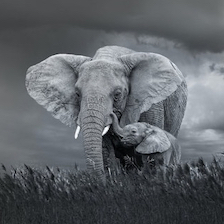

In [19]:
#Display the first image
dataset["train"]["image"][0]

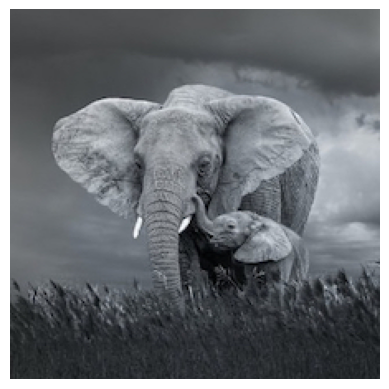

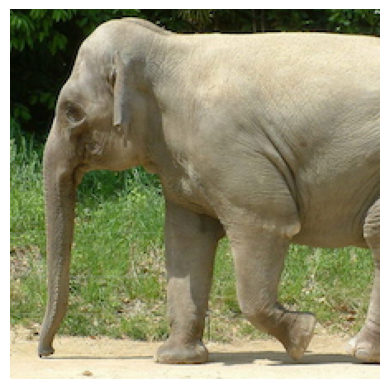

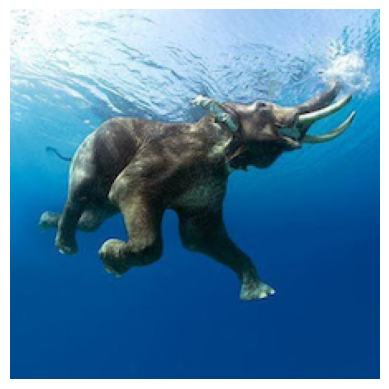

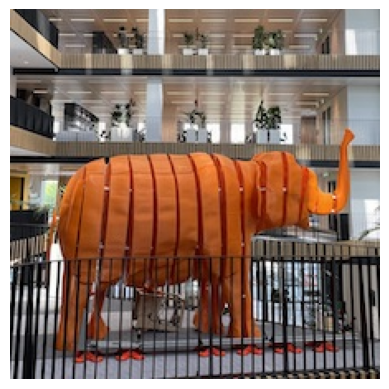

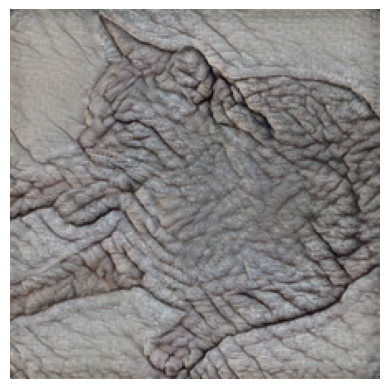

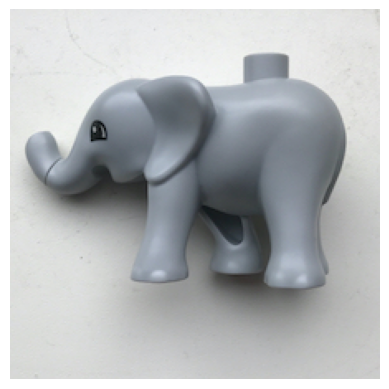

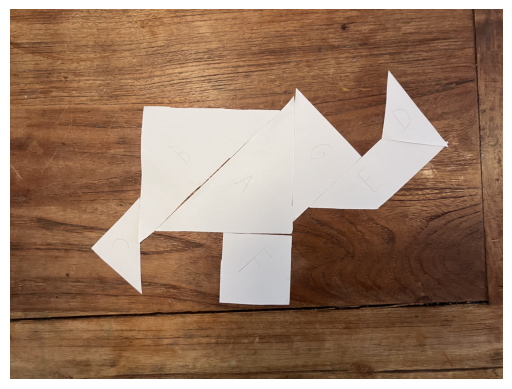

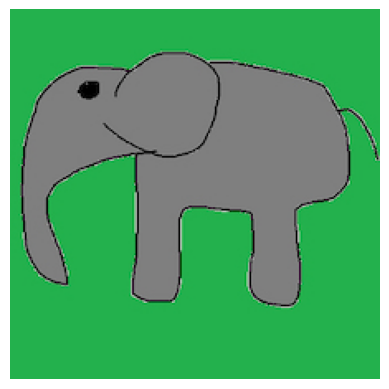

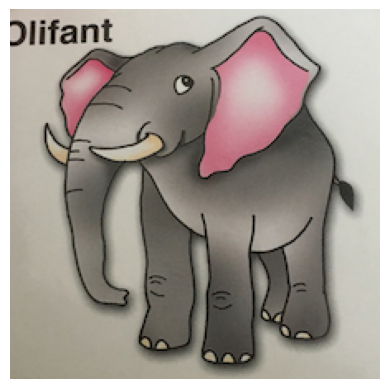

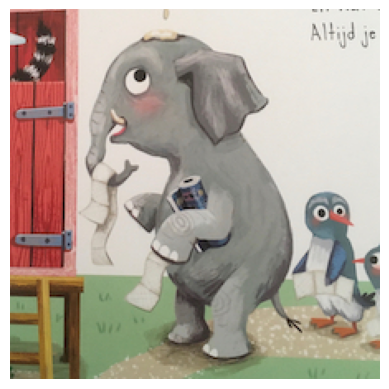

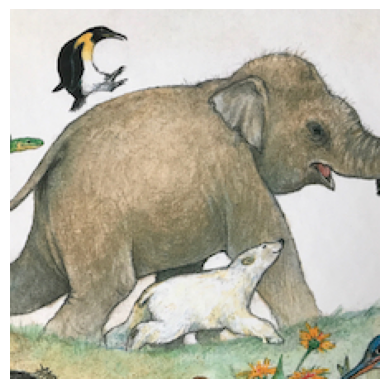

In [20]:
#display all images
import matplotlib.pyplot as plt

for i in range(len(dataset["train"])):
    image = (dataset["train"]["image"][i])
    #image.show()
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()

### EXERCISE 1: Download the model

Follow these steps:
1. Go to https://huggingface.co/microsoft/resnet-50
2. Click button 'Use this model'. Select Transformers
3. Copy code under 'Load model directly'

In [21]:
#YOUR COPIED CODE HERE

# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")


## 2. Run inference

In [22]:
#the inference function
def infer_ResNet(image):
    global predicted_class_label
    global confidence
    inputs = processor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()
    predicted_class_label = model.config.id2label[predicted_class_idx]
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    confidence = probabilities[0][predicted_class_idx].item()
    
    return predicted_class_label, confidence


In [23]:
#call the function
infer_ResNet(image)

('Indian elephant, Elephas maximus', 0.3439900279045105)

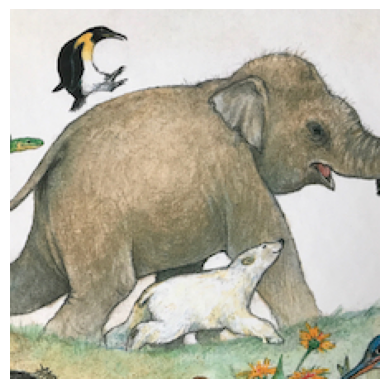

In [24]:
#show the image
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers
plt.show()

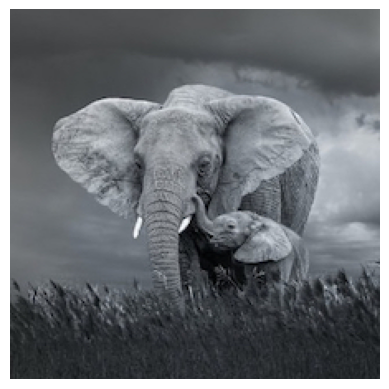

African elephant, Loxodonta africana 0.9666374921798706


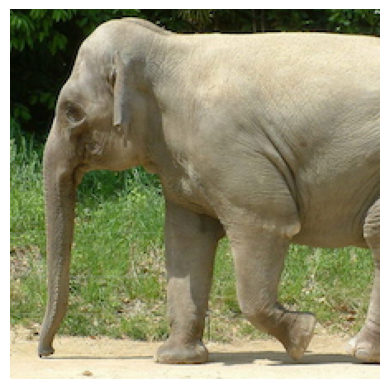

Indian elephant, Elephas maximus 0.9780346155166626


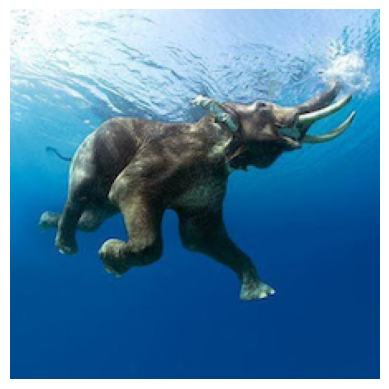

dugong, Dugong dugon 0.23262445628643036


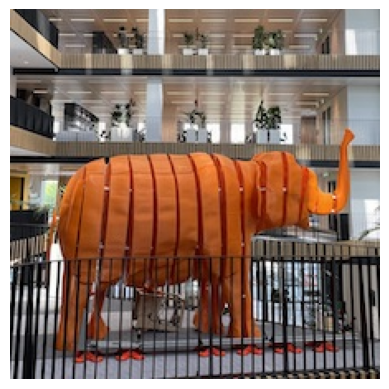

palace 0.35569366812705994


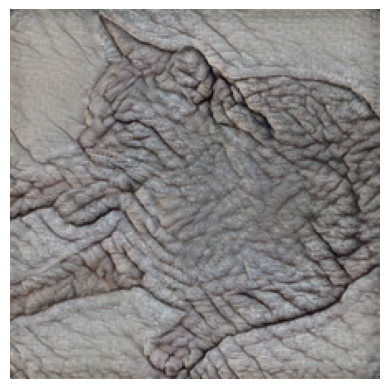

Indian elephant, Elephas maximus 0.9981716871261597


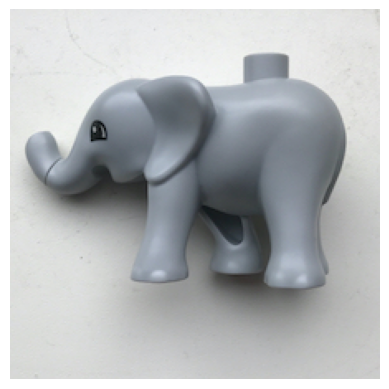

pencil sharpener 0.9955724477767944


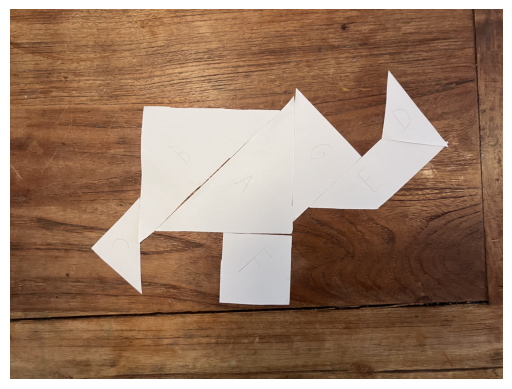

envelope 0.9849753975868225


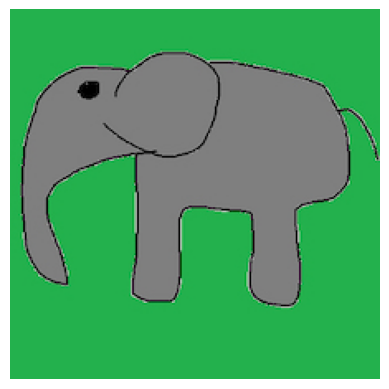

hatchet 0.08818183094263077


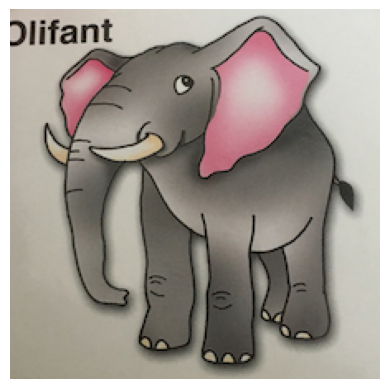

comic book 0.19157102704048157


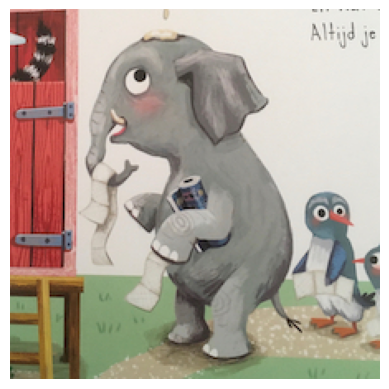

triceratops 0.526360034942627


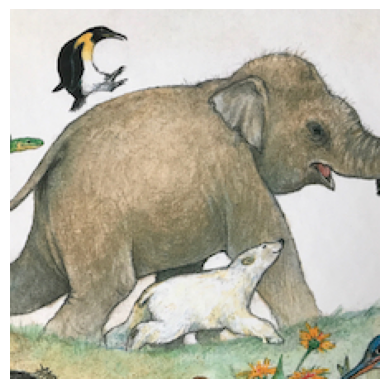

Indian elephant, Elephas maximus 0.3439900279045105


In [25]:
#Call the function for all images
for i in range(len(dataset['train'])):
    image = (dataset["train"]["image"][i])
    infer_ResNet(image)
    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    print(predicted_class_label, confidence)

### Exercise 2: Reflectievragen

Beantwoord de volgende vragen.

1. Geef in je eigen woorden een korte beschrijving van het model ResNet.
2. Hoeveel images werden goed geklassificeerd als olifant (indiaas/afrikaans). 
3. Beschrijf in je eigen woorden waar het model de fout in gaat.  
4. Beschrijf wat Supervised Learning is en waarom aan deze aanpak beperkingen zitten. 